这个文档用来分析study'TIMs_Hetero_tempsweep_Task_Pareto'上获得帕累托的点的TIMs，以及任务表现（目前仅有NARMA-10）

预期：1. 画出帕累托前沿点；见文件夹；2.查看帕累托前沿上的点的TIMs

### 库

In [9]:
import sys
import os
import glob
import pandas as pd
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
current_dir = os.getcwd()
parent_dir = os.path.abspath(os.path.join(current_dir, '..'))
if parent_dir not in sys.path:
    sys.path.append(parent_dir)
from Plotting import plot_style_config
from Plotting import ParetoFront_Plotting
from Analysis.analysis_TIMs_with_temperatures import analysis_TIMs_with_temperatures
from Analysis.assisted_functions import load_data
from Analysis.assisted_functions import analyze_correlations
from Analysis.assisted_plotting import plot_scatter
from Analysis.assisted_plotting import plot_bar

'''
NARMA10' result columns:['temp', 'MSE', 'NRMSE', 'y_test', 'pred']
'''

"\nNARMA10' result columns:['temp', 'MSE', 'NRMSE', 'y_test', 'pred']\n"

### 看看TIMs_hetero中的TIMs分析

In [5]:
# 提取数据
MC_data = load_data("../paretofront_points_TIMs_NARMA10", "result_MC_heterogeneous", ['temp', 'MC'])
CQ_data = load_data("../paretofront_points_TIMs_NARMA10", "result_KRandGR_heterogeneous", ['temp', 'CQ'])
KR_data = load_data("../paretofront_points_TIMs_NARMA10", "result_KRandGR_heterogeneous", ['temp', 'KR'])
GR_data = load_data("../paretofront_points_TIMs_NARMA10", "result_KRandGR_heterogeneous", ['temp', 'GR'])
NARMA10_data = load_data("../paretofront_points_TIMs_NARMA10", "result_NARMA10_heterogeneous", ['temp', 'NRMSE'])

print(MC_data)


#以number为key
labels = MC_data['number'].unique()


# 创建字典，来存储每个number的分析结果
MC_results = {}
CQ_results = {}
KR_results = {}
GR_results = {}
NARMA10_results = {}

for label in labels:

    subset_MC = MC_data[MC_data['number'] == label].sort_values('temp') # 按temp排序
    subset_CQ = CQ_data[CQ_data['number'] == label].sort_values('temp')
    subset_KR = KR_data[KR_data['number'] == label].sort_values('temp')
    subset_GR = GR_data[GR_data['number'] == label].sort_values('temp')
    subset_NARMA10 = NARMA10_data[NARMA10_data['number'] == label].sort_values('temp')

    MC_analysis = analysis_TIMs_with_temperatures(subset_MC['MC']) # 使用辅助函数
    CQ_analysis = analysis_TIMs_with_temperatures(subset_CQ['CQ'])
    KR_analysis = analysis_TIMs_with_temperatures(subset_KR['KR'])
    GR_analysis = analysis_TIMs_with_temperatures(subset_GR['GR'])
    NARMA10_analysis = analysis_TIMs_with_temperatures(subset_NARMA10['NRMSE'])

    MC_results[label] = MC_analysis
    CQ_results[label] = CQ_analysis
    KR_results[label] = KR_analysis
    GR_results[label] = GR_analysis
    NARMA10_results[label] = NARMA10_analysis

# 结果转换为DF
MC_results = pd.DataFrame(MC_results).T
CQ_results = pd.DataFrame(CQ_results).T
KR_results = pd.DataFrame(KR_results).T
GR_results = pd.DataFrame(GR_results).T
NARMA10_results = pd.DataFrame(NARMA10_results).T

print(NARMA10_results)


找到 11 个文件，开始处理...
找到 11 个文件，开始处理...
找到 11 个文件，开始处理...
找到 11 个文件，开始处理...
找到 11 个文件，开始处理...
    temp        MC  number
48  20.1  4.937483       1
49  20.2  4.974730       1
50  20.3  4.954238       1
51  20.4  4.964111       1
52  20.5  5.013663       1
..   ...       ...     ...
37  20.9  4.401169      11
19  19.1  4.484759      11
21  19.3  4.330039      11
20  19.2  4.407928      11
32  20.4  4.317073      11

[209 rows x 3 columns]
          CV   rCV_MAD       avg      mean    median       std       var  \
1   0.341899  0.298393  0.917690  0.917690  0.839276  0.313757  0.098444   
2   0.344966  0.413929  1.057282  1.057282  1.011634  0.364726  0.133025   
3   0.364557  0.337558  1.002088  1.002088  0.953143  0.365318  0.133457   
4   0.361552  0.291309  0.937656  0.937656  0.846646  0.339012  0.114929   
5   0.378775  0.469808  1.111355  1.111355  1.047273  0.420953  0.177201   
6   0.240995  0.249975  0.803319  0.803319  0.724606  0.193596  0.037479   
7   0.212505  0.245752  0.8068

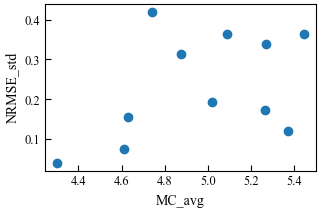

In [11]:
# 选择合理的可靠性指标：
# 1. Coefficient of Variation (CV)
# 2. Standard Deviation (std)
# 3. Average NRMSE(avg)
# 4. MAD/median (rCV_MAD)

# 画出CV与features的散点图
plot_scatter(MC_results['avg'],NARMA10_results['std'] , 'MC_avg', 'NRMSE_std')

### 看看TIMs_hetero_random中的TIMs分析

In [ ]:
# 提取数据
MC_data = load_data("../random_points_TIMs_hetero", "result_MC_heterogeneous", ['temp', 'MC'])
CQ_data = load_data("../random_points_TIMs_hetero", "result_KRandGR_heterogeneous", ['temp', 'CQ'])
KR_data = load_data("../random_points_TIMs_hetero", "result_KRandGR_heterogeneous", ['temp', 'KR'])
GR_data = load_data("../random_points_TIMs_hetero", "result_KRandGR_heterogeneous", ['temp', 'GR'])
NARMA10_data = load_data("../random_points_TIMs_hetero", "result_NARMA10_heterogeneous", ['temp', 'NRMSE'])


#以number为key
labels = MC_data['number'].unique()

# # 查看NARMA10_data的是不是df
# print(type(MC_data))
# print(type(NARMA10_data))

# print(MC_data.T)
# print(NARMA10_data.T)

# 把NARMA10_data中的number转换为int
NARMA10_data['number'] = NARMA10_data['number'].astype(int)

# subset_NARMA10 = NARMA10_data[NARMA10_data['number'] == 0].sort_values('temp')
# print(subset_NARMA10)

# 创建字典，来存储每个number的分析结果
MC_results = {}
CQ_results = {}
KR_results = {}
GR_results = {}
NARMA10_results = {}

for label in labels:

    subset_MC = MC_data[MC_data['number'] == label].sort_values('temp') # 按temp排序
    subset_CQ = CQ_data[CQ_data['number'] == label].sort_values('temp')
    subset_KR = KR_data[KR_data['number'] == label].sort_values('temp')
    subset_GR = GR_data[GR_data['number'] == label].sort_values('temp')
    subset_NARMA10 = NARMA10_data[NARMA10_data['number'] == label].sort_values('temp')


    MC_analysis = analysis_TIMs_with_temperatures(subset_MC['MC']) # 使用辅助函数
    CQ_analysis = analysis_TIMs_with_temperatures(subset_CQ['CQ'])
    KR_analysis = analysis_TIMs_with_temperatures(subset_KR['KR'])
    GR_analysis = analysis_TIMs_with_temperatures(subset_GR['GR'])
    NARMA10_analysis = analysis_TIMs_with_temperatures(subset_NARMA10['NRMSE'])

    MC_results[label] = MC_analysis
    CQ_results[label] = CQ_analysis
    KR_results[label] = KR_analysis
    GR_results[label] = GR_analysis
    NARMA10_results[label] = NARMA10_analysis

# 结果转换为DF
MC_results = pd.DataFrame(MC_results).T
CQ_results = pd.DataFrame(CQ_results).T
KR_results = pd.DataFrame(KR_results).T
GR_results = pd.DataFrame(GR_results).T
NARMA10_results = pd.DataFrame(NARMA10_results).T

# 保存为csv文件
NARMA10_results.to_csv('NARMA10_results_random_200.csv', index=False)
MC_results.to_csv('MC_results_random_200.csv', index=False)
CQ_results.to_csv('CQ_results_random_200.csv', index=False)
KR_results.to_csv('KR_results_random_200.csv', index=False)
GR_results.to_csv('GR_results_random_200.csv', index=False)


print(NARMA10_results)


找到 138 个文件，开始处理...
找到 138 个文件，开始处理...
找到 138 个文件，开始处理...
找到 138 个文件，开始处理...
找到 138 个文件，开始处理...
           CV   rCV_MAD       avg      mean    median       std       var  \
0    0.023706  0.019296  0.930151  0.930151  0.926492  0.022050  0.000486   
1    0.311910  0.376363  1.545515  1.545515  1.597421  0.482061  0.232383   
2    0.002631  0.001563  0.853321  0.853321  0.852934  0.002245  0.000005   
4    0.001659  0.001580  1.021535  1.021535  1.022120  0.001695  0.000003   
5    0.265387  0.363849  1.290042  1.290042  1.207709  0.342360  0.117210   
..        ...       ...       ...       ...       ...       ...       ...   
307  0.212505  0.245752  0.806898  0.806898  0.771400  0.171470  0.029402   
308  0.194665  0.236053  0.791889  0.791889  0.765413  0.154153  0.023763   
309  0.158113  0.178025  0.757734  0.757734  0.738779  0.119807  0.014354   
310  0.097232  0.131890  0.771681  0.771681  0.764877  0.075032  0.005630   
311  0.051896  0.040847  0.741130  0.741130  0.726971  0.0

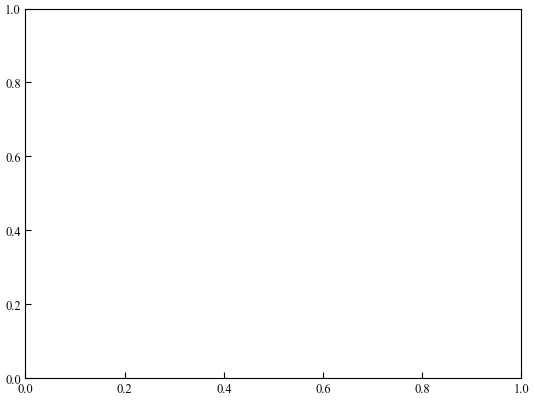

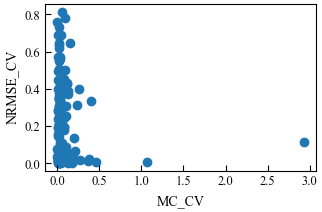

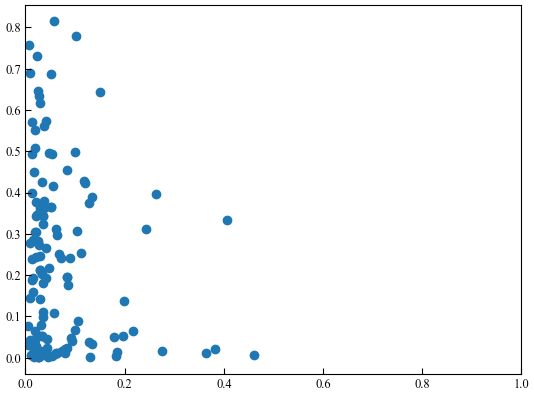

In [18]:
# 选择合理的可靠性指标：
# 1. Coefficient of Variation (CV)
# 2. Standard Deviation (std)
# 3. Average NRMSE(avg)
# 4. MAD/median (rCV_MAD)

# 画出CV与features的散点图
plot_scatter(MC_results['CV'],NARMA10_results['CV'] , 'MC_CV', 'NRMSE_CV')

# 画一个散点图
plt.figure()
plt.scatter(MC_results['CV'],NARMA10_results['CV'])
plt.xlim(0,1)
plt.show()





In [10]:

#遍历所有number的储层，进行TIMs特征分析
labels = df_all['number'].unique()
# 创建一个字典来存储每个number的分析结果
analysis_results_dict = {}
for label in labels:
    subset = df_all[df_all['number'] == label].sort_values('temp')
    analysis_results = analysis_TIMs_with_temperatures(subset['MC'])
    analysis_results_dict[label] = analysis_results

# 将分析结果转换为DataFrame
analysis_results_df = pd.DataFrame(analysis_results_dict)


# 提取每个储层的averagenrmse数据
filename = '../random_points_TIMs_hetero/NARMA10_nrmse.csv'

averagenrmse = pd.read_csv(filename)

# 创建一个字典，number -> averagenrmse值
averagenrmse_dict = dict(zip(averagenrmse['number'], averagenrmse['averagenrmse']))

# 创建一行数据，索引对齐到analysis_results_df的列
averagenrmse_row = pd.Series({
    num: averagenrmse_dict.get(int(num) if isinstance(num, str) else num, np.nan)
    for num in analysis_results_df.columns
}, name='averagenrmse')

# 添加到analysis_results_df
analysis_results_df.loc['averagenrmse'] = averagenrmse_row

print(analysis_results_df)

# 将analysis_results_df保存为csv文件
# 首先将数据转置下
analysis_results_df = analysis_results_df.T
# 保存成csv文件
analysis_results_df.to_csv('analysis_results_random_mc.csv', index=False)


                               5         7         9         17        33   \
mean                      3.073722  3.466354  4.872863  0.794379  1.770831   
median                    3.041315  3.488738  4.898507  0.921463  1.760216   
std                       0.125594  0.065270  0.168486  0.304021  0.385182   
var                       0.015774  0.004260  0.028388  0.092428  0.148365   
amplitude                 0.420320  0.257774  0.573306  0.960570  1.473009   
first_order_sensitivity  -0.011408  0.009370  0.029783  0.033945 -0.068164   
second_order_sensitivity  0.003954 -0.000616  0.000208 -0.006594  0.001081   
averagenrmse              1.406739  0.932877  0.996049  1.035557  0.979777   

                               46        73        76        90        93   \
mean                      0.429890  0.894854  3.738048  3.962433  3.801547   
median                    0.462682  0.901978  4.041269  3.952000  3.813405   
std                       0.129651  0.056084  0.735462  0.07220

In [12]:
tims_features = ['mean', 'median', 'std', 'var', 'amplitude', 
                 'first_order_sensitivity', 'second_order_sensitivity']
analyze_correlations(analysis_results_df,tims_features,target_metric='averagenrmse',plot=True)

ValueError: 'averagenrmse' not found in analysis_results_df.index

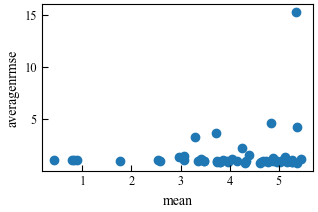

In [39]:
# 我想要将所有mean提取出来
std_values = analysis_results_df.loc['mean']
averagenrmse_values = analysis_results_df.loc['averagenrmse']

# 画出mean与averagenrmse的散点图
plot_scatter(std_values, averagenrmse_values, 'mean', 'averagenrmse')

In [82]:
# 看看部分KRandGR的分析
# 设定参数
folder_loc = "../random_points_TIMs_hetero" # 相对路径
pattern = "result_KRandGR_heterogeneous"
cols_needed = ['temp', 'CQ'] # 假设你需要这两列，根据实际情况修改

# 调用函数
df_all = load_data(folder_loc, pattern, cols_needed)

# 检查数据
print(df_all)




找到 39 个文件，开始处理...
     temp  CQ  number
617  20.0  64       5
614  19.7  63       5
623  20.6  66       5
622  20.5  66       5
621  20.4  64       5
..    ...  ..     ...
569  20.9  35     289
560  20.0  41     289
564  20.4  37     289
563  20.3  39     289
567  20.7  34     289

[741 rows x 3 columns]


In [84]:
#遍历所有number的储层，进行TIMs特征分析
labels = df_all['number'].unique()
# 创建一个字典来存储每个number的分析结果
analysis_results_dict = {}
for label in labels:
    subset = df_all[df_all['number'] == label].sort_values('temp')
    analysis_results = analysis_TIMs_with_temperatures(subset['CQ'])
    analysis_results_dict[label] = analysis_results

# 将分析结果转换为DataFrame
analysis_results_df = pd.DataFrame(analysis_results_dict)


# 提取每个储层的averagenrmse数据
filename = '../random_points_TIMs_hetero/NARMA10_nrmse.csv'

averagenrmse = pd.read_csv(filename)

# 创建一个字典，number -> averagenrmse值
averagenrmse_dict = dict(zip(averagenrmse['number'], averagenrmse['averagenrmse']))

# 创建一行数据，索引对齐到analysis_results_df的列
averagenrmse_row = pd.Series({
    num: averagenrmse_dict.get(int(num) if isinstance(num, str) else num, np.nan)
    for num in analysis_results_df.columns
}, name='averagenrmse')

# 添加到analysis_results_df
analysis_results_df.loc['averagenrmse'] = averagenrmse_row

print(analysis_results_df)

# 将analysis_results_df保存为csv文件
# 首先将数据转置下
analysis_results_df = analysis_results_df.T
# 保存成csv文件
analysis_results_df.to_csv('analysis_results_random_cq.csv', index=False)

                                5          7          9          17   \
mean                      63.526316  69.421053   0.842105   8.368421   
median                    64.000000  69.000000   1.000000  13.000000   
std                        3.282624   3.014278   2.978222   6.466192   
var                       10.775623   9.085873   8.869806  41.811634   
amplitude                 12.000000   9.000000  11.000000  16.000000   
first_order_sensitivity    0.568421   0.526316  -0.466667   1.017544   
second_order_sensitivity  -0.016659   0.006634  -0.020050  -0.037299   
averagenrmse               1.406739   0.932877   0.996049   1.035557   

                                 33         46        73         76   \
mean                       60.631579  -9.789474  5.526316  86.421053   
median                     65.000000 -10.000000  6.000000  87.000000   
std                        13.421156   1.104009  1.271900   4.671479   
var                       180.127424   1.218837  1.617729  21.8

### 看看TIMs_hetero_random_all200中TIMs分析


In [39]:
# 设定参数
folder_loc = "../random_points_TIMs_hetero" # 相对路径
pattern = "result_MC_heterogeneous"
cols_needed = ['temp', 'MC'] # 假设你需要这两列，根据实际情况修改

# 调用函数
df_all = load_data(folder_loc, pattern, cols_needed)

# 检查数据
print(df_all)

找到 172 个文件，开始处理...
      temp        MC  number
0     19.1  2.905567       0
1     19.2  3.293432       0
2     19.3  3.129660       0
17    20.8  2.811891       0
18    20.9  2.769012       0
...    ...       ...     ...
2484  20.5  4.461886     311
2485  20.6  4.389892     311
2486  20.7  4.477723     311
2487  20.8  4.336156     311
2488  20.9  4.401169     311

[3268 rows x 3 columns]


In [40]:
#遍历所有number的储层，进行TIMs特征分析
labels = df_all['number'].unique()
# 创建一个字典来存储每个number的分析结果
analysis_results_dict = {}
for label in labels:
    subset = df_all[df_all['number'] == label].sort_values('temp')
    analysis_results = analysis_TIMs_with_temperatures(subset['MC'])
    analysis_results_dict[label] = analysis_results

# 将分析结果转换为DataFrame
analysis_results_df = pd.DataFrame(analysis_results_dict)


# 提取每个储层的averagenrmse数据
filename = '../random_points_TIMs_hetero/NARMA10_nrmse.csv'

averagenrmse = pd.read_csv(filename)

# 创建一个字典，number -> averagenrmse值
averagenrmse_dict = dict(zip(averagenrmse['number'], averagenrmse['averagenrmse']))

# 创建一行数据，索引对齐到analysis_results_df的列
averagenrmse_row = pd.Series({
    num: averagenrmse_dict.get(int(num) if isinstance(num, str) else num, np.nan)
    for num in analysis_results_df.columns
}, name='averagenrmse')

# 添加到analysis_results_df
analysis_results_df.loc['averagenrmse'] = averagenrmse_row

print(analysis_results_df)

# 将analysis_results_df保存为csv文件
# 首先将数据转置下
analysis_results_df = analysis_results_df.T
# 保存成csv文件
analysis_results_df.to_csv('analysis_results_random_mc.csv', index=False)

                               0         1         2         4         5    \
mean                      2.908763  0.920831  3.425079  0.862556  3.073722   
median                    2.905567  0.932026  3.453571  0.881567  3.041315   
std                       0.244819  0.223897  0.096165  0.111690  0.125594   
var                       0.059937  0.050130  0.009248  0.012475  0.015774   
amplitude                 1.008851  0.830887  0.309557  0.486604  0.420320   
first_order_sensitivity  -0.015203  0.017244 -0.012542 -0.016478 -0.011408   
second_order_sensitivity  0.001770  0.002430 -0.002450  0.000154  0.003954   
averagenrmse                   NaN       NaN       NaN       NaN  1.406739   

                               7         8         9         16        17   \
mean                      3.466354  3.764795  4.872863  0.383626  0.794379   
median                    3.488738  3.794685  4.898507  0.358256  0.921463   
std                       0.065270  0.212319  0.168486  0.10524

### 看看TIMs_hetero_random中TIMs分析与minnrmse的关系

In [40]:
# 设定参数
folder_loc = "../random_points_TIMs_hetero" # 相对路径
pattern = "result_MC_heterogeneous"
cols_needed = ['temp', 'MC'] # 假设你需要这两列，根据实际情况修改

# 调用函数
df_all = load_data(folder_loc, pattern, cols_needed)

# 检查数据
print(df_all)

找到 50 个文件，开始处理...
     temp        MC  number
832  20.6  3.041315       5
831  20.5  3.006545       5
825  19.9  2.930773       5
824  19.8  2.966966       5
827  20.1  2.937803       5
..    ...       ...     ...
761  19.2  4.407928     311
760  19.1  4.484759     311
778  20.9  4.401169     311
776  20.7  4.477723     311
773  20.4  4.317073     311

[950 rows x 3 columns]


In [59]:
#遍历所有number的储层，进行TIMs特征分析
labels = df_all['number'].unique()
# 创建一个字典来存储每个number的分析结果
analysis_results_dict = {}
for label in labels:
    subset = df_all[df_all['number'] == label].sort_values('temp')
    analysis_results = analysis_TIMs_with_temperatures(subset['MC'])
    analysis_results_dict[label] = analysis_results

# 将分析结果转换为DataFrame
analysis_results_df = pd.DataFrame(analysis_results_dict)


# 提取每个储层的averagenrmse数据
filename = '../random_points_TIMs_hetero/NARMA10_nrmse.csv'

averagenrmse = pd.read_csv(filename)

# 创建一个字典，number -> averagenrmse值
averagenrmse_dict = dict(zip(averagenrmse['number'], averagenrmse['averagenrmse']))
minnrmse_dict = dict(zip(averagenrmse['number'], averagenrmse['minnrmse']))

# 创建一行数据，索引对齐到analysis_results_df的列
averagenrmse_row = pd.Series({
    num: averagenrmse_dict.get(int(num) if isinstance(num, str) else num, np.nan)
    for num in analysis_results_df.columns
}, name='averagenrmse')
minnrmse_row = pd.Series({
    num: minnrmse_dict.get(int(num) if isinstance(num, str) else num, np.nan)
    for num in analysis_results_df.columns
}, name='minnrmse')

# 添加到analysis_results_df
analysis_results_df.loc['averagenrmse'] = averagenrmse_row
analysis_results_df.loc['minnrmse'] = minnrmse_row

print(analysis_results_df)

KeyError: 'MC'

特征与 minnrmse 的相关性分析结果
Feature                   Pearson r    Pearson p    Spearman ρ   Spearman p  
--------------------------------------------------------------------------------
mean                      -0.7784 ***   0.0000   -0.7934 ***   0.0000
median                    -0.7755 ***   0.0000   -0.7769 ***   0.0000
std                        0.2333       0.1030    0.0406       0.7798
var                        0.3076 *     0.0298    0.0406       0.7798
amplitude                  0.2291       0.1095    0.0714       0.6220
first_order_sensitivity   -0.6322 ***   0.0000   -0.6765 ***   0.0000
second_order_sensitivity  -0.0066       0.9639   -0.0617       0.6704
显著性水平: *** p<0.001, ** p<0.01, * p<0.05



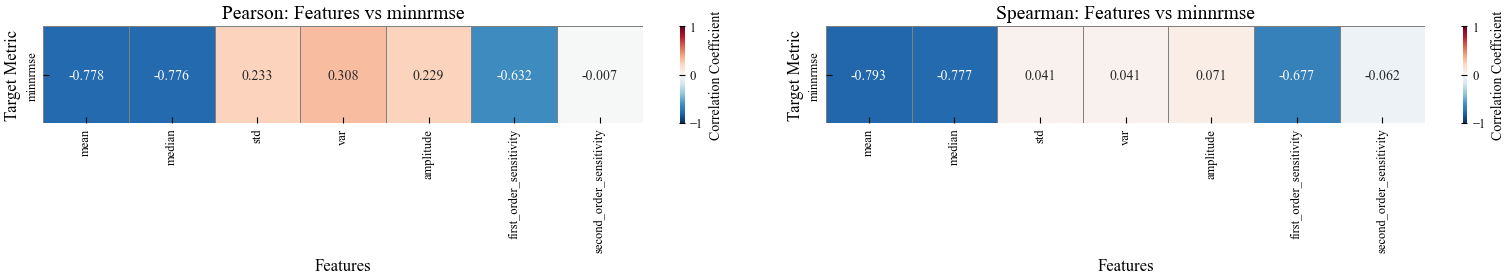

In [42]:
tims_features = ['mean', 'median', 'std', 'var', 'amplitude', 
                 'first_order_sensitivity', 'second_order_sensitivity']
analyze_correlations(analysis_results_df,tims_features,target_metric='minnrmse',plot=True)

### 看看TIMs_hetero中的TIMs分析：储层的MC(T)和CQ(T)的协同性

In [17]:
# 设定参数
folder_loc = "../paretofront_points_TIMs_NARMA10" # 相对路径
pattern = "result_MC_heterogeneous"
cols_needed = ['temp', 'MC'] # 假设你需要这两列，根据实际情况修改

# 调用函数
MCT = load_data(folder_loc, pattern, cols_needed)

# 设定参数
folder_loc = "../paretofront_points_TIMs_NARMA10" # 相对路径
pattern = "result_KRandGR_heterogeneous"
cols_needed = ['temp', 'CQ'] # 假设你需要这两列，根据实际情况修改

# 调用函数
CQT = load_data(folder_loc, pattern, cols_needed)


找到 11 个文件，开始处理...
找到 11 个文件，开始处理...


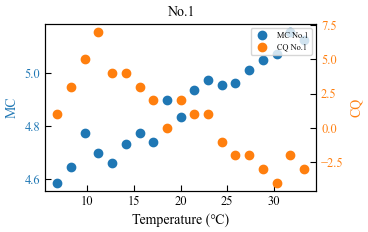

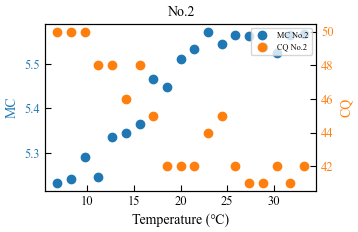

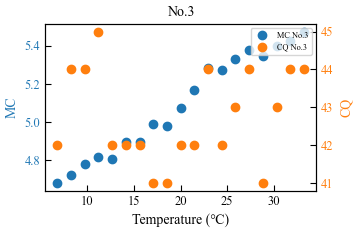

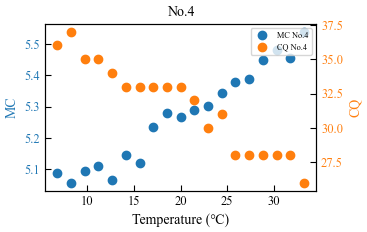

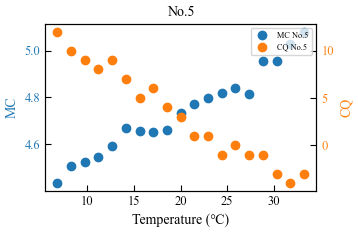

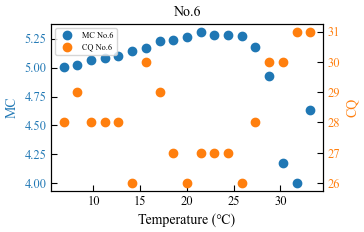

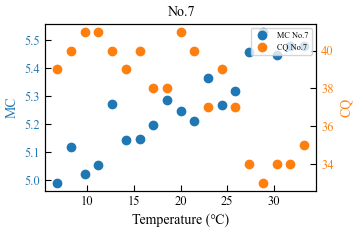

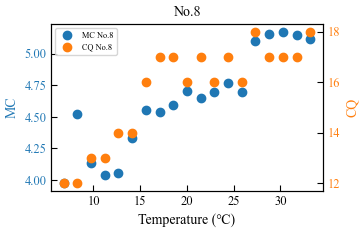

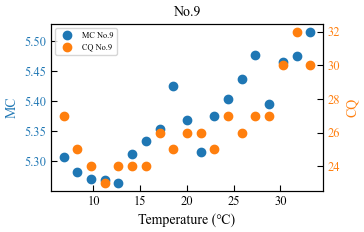

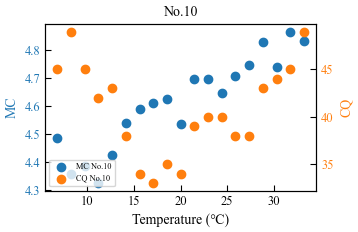

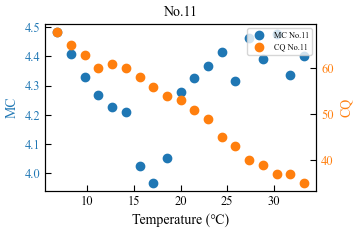

In [27]:
# 开始画图
plot_style_config.set_pub_style()

# 获取所有唯一的标签
labels_MCT = MCT['number'].unique()

# 循环遍历每一个标签，单独画一条线（双y轴版本）, 并保存为 png
for label in labels_MCT:
    fig, ax1 = plt.subplots(figsize=plot_style_config.get_figsize('single'))
    # 筛选出当前标签的数据
    subset_MCT = MCT[MCT['number'] == label]
    subset_CQT = CQT[CQT['number'] == label]

    # 数据转换，将Temp转换成真的Temp_degree
    subset_MCT['temp'] = subset_MCT['temp']/20 *293.15-273.15
    subset_CQT['temp'] = subset_CQT['temp']/20 * 293.15-273.15

    
    color_mc = 'tab:blue'
    color_cq = 'tab:orange'
    
    ax1.set_xlabel('Temperature (℃)')
    ax1.set_ylabel('MC', color=color_mc)
    ax1.scatter(
        subset_MCT['temp'],
        subset_MCT['MC'],
        label=f'MC No.{label}',
        marker='o',
        color=color_mc,
        linewidth=1
    )
    ax1.tick_params(axis='y', labelcolor=color_mc)

    # 创建第二个y轴
    ax2 = ax1.twinx()
    ax2.set_ylabel('CQ', color=color_cq)
    ax2.scatter(
        subset_CQT['temp'],
        subset_CQT['CQ'],
        label=f'CQ No.{label}',
        marker='o',
        color=color_cq,
        linewidth=1
    )
    ax2.tick_params(axis='y', labelcolor=color_cq)

    # 合并图例
    handles1, labels1 = ax1.get_legend_handles_labels()
    handles2, labels2 = ax2.get_legend_handles_labels()
    plt.legend(handles1 + handles2, labels1 + labels2, loc='best')

    plt.title(f'No.{label}')
    fname = f"reservoir_{label}.png"
    fig.savefig(fname, dpi=300, bbox_inches='tight')
    plt.show()


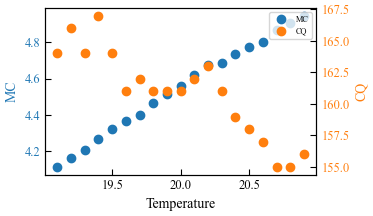

In [51]:
# uniform的MC与CQ
filename1 = '../result_MC_uniform_tr19.03to21.08s0.1_bs16.78_bt20.0_temp_sweep.csv'
df_mc = pd.read_csv(filename1)
filename2 = '../result_KRandGR_uniform_tr19.03to21.08s0.1_bs16.78_bt20.0_temp_sweep.csv'
df_cq = pd.read_csv(filename2)
fig, ax1 = plt.subplots(figsize=plot_style_config.get_figsize('single'))

color_mc = 'tab:blue'
color_cq = 'tab:orange'

ax1.set_xlabel('Temperature')
ax1.set_ylabel('MC', color=color_mc)
ax1.scatter(
    df_mc['temp'],
    df_mc['MC'],
    label=f'MC',
    marker='o',
    color=color_mc,
    linewidth=1
)
ax1.tick_params(axis='y', labelcolor=color_mc)

# 创建第二个y轴
ax2 = ax1.twinx()
ax2.set_ylabel('CQ', color=color_cq)
ax2.scatter(
    df_cq['temp'],
    df_cq['CQ'],
    label=f'CQ',
    marker='o',
    color=color_cq,
    linewidth=1
)
ax2.tick_params(axis='y', labelcolor=color_cq)

# 合并图例
handles1, labels1 = ax1.get_legend_handles_labels()
handles2, labels2 = ax2.get_legend_handles_labels()
plt.legend(handles1 + handles2, labels1 + labels2, loc='best')

plt.show()





### 计算下uniform的TIMs特征


In [35]:
filename1 = '../result_MC_uniform_tr19.03to21.08s0.1_bs16.78_bt20.0_temp_sweep.csv'
df_uniform = pd.read_csv(filename1)

# 对mc_array进行TIMs特征分析
analysis_results = analysis_TIMs_with_temperatures(df_uniform['MC'])
print(analysis_results)


{'mean': np.float64(4.5467719966200875), 'median': np.float64(4.5610417113540205), 'std': np.float64(0.25491974702332204), 'var': np.float64(0.06498407742243452), 'amplitude': np.float64(0.8364891348104386), 'first_order_sensitivity': np.float64(0.0464610916006523), 'second_order_sensitivity': np.float64(-0.0004471407843780195)}


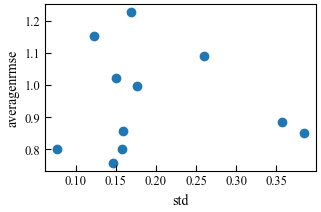

In [14]:
# 尝试画一下average_MC与averagenrmse的散点图

# 我想要将所有mean提取出来
std_values = analysis_results_df.loc['std']
averagenrmse_values = analysis_results_df.loc['averagenrmse']

# 画出mean与averagenrmse的散点图
plot_scatter(std_values, averagenrmse_values, 'std', 'averagenrmse')

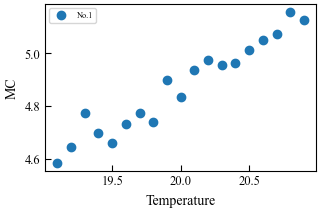

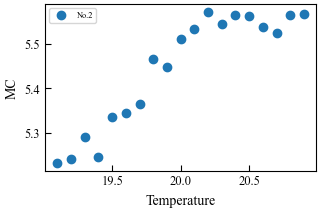

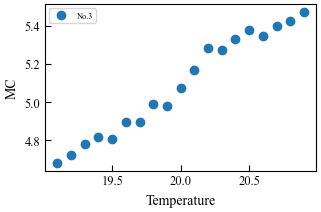

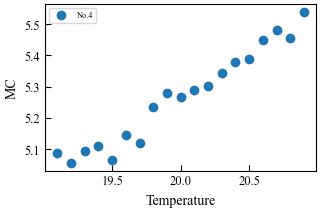

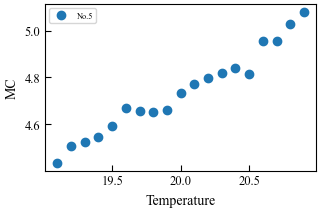

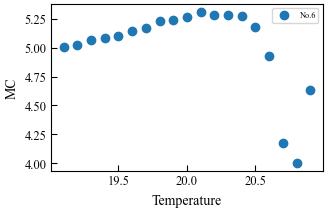

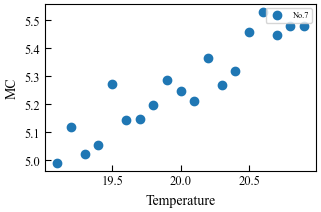

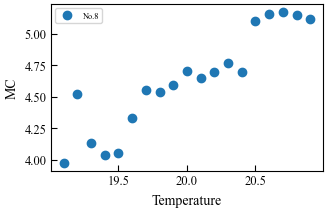

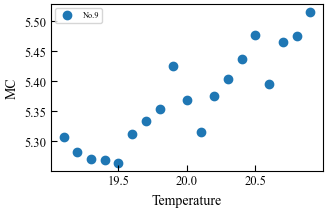

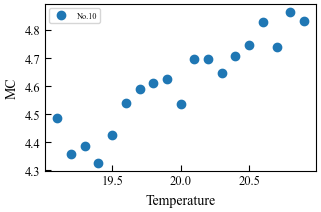

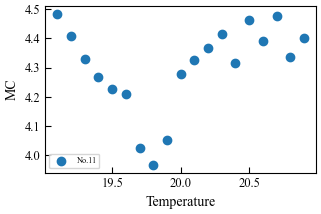

In [ ]:
# 开始画图
plot_style_config.set_pub_style()
 # 修正了括号

# 获取所有唯一的标签
labels = df_all['number'].unique()

# 循环遍历每一个标签，单独画一条线
for label in labels:

    plt.figure(figsize=plot_style_config.get_figsize('single'))
    # 筛选出当前标签的数据
    subset = df_all[df_all['number'] == label]
    
    plt.scatter(
        subset['temp'],
        subset['MC'],
        label=label,  # 这里使用标签作为图例
        marker='o',
        linewidth=1
    )

    plt.xlabel('Temperature')
    plt.ylabel('MC')
    plt.legend([f'No.{label}']) # 显示图例
    plt.show()


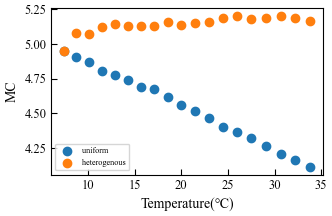

In [35]:
# 看下uniform的数据

filename1 = '../result_MC_uniform_tr19.03to21.08s0.1_bs16.78_bt20.0_temp_sweep.csv'
filename2 = '../result_MC_heterogeneous_n6_sr20to30_w0.18-0.2-0.16-0.2-0.15-0.098_tr19.03to21.08s0.1_bs20_bt20.0_temp_sweep.csv'
df_uniform = pd.read_csv(filename1)
df_heterogeneous = pd.read_csv(filename2)
plt.figure(figsize=plot_style_config.get_figsize('single'))

df_uniform['temp'] = 20/df_uniform['temp'] *293.15-273.15
df_heterogeneous['temp'] = 20/df_heterogeneous['temp'] *293.15-273.15
plt.scatter(
    df_uniform['temp'],
    df_uniform['MC'],
    label='uniform',
    marker='o',
    linewidth=1
)
plt.scatter(
    df_heterogeneous['temp'],
    df_heterogeneous['MC'],
    label='heterogenous',
    marker='o',
    linewidth=1
)
plt.xlabel('Temperature(℃)')
plt.ylabel('MC')
plt.legend()
plt.show()


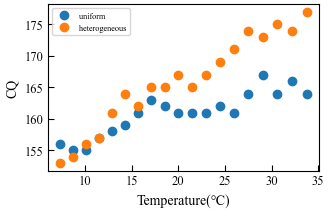

In [38]:
filename1 = '../result_KRandGR_uniform_tr19.03to21.08s0.1_bs16.78_bt20.0_temp_sweep.csv'
filename2 = '../result_KRandGR_heterogeneous_n6_sr20to30_w0.18-0.2-0.16-0.2-0.15-0.098_tr19.03to21.08s0.1_bs20_bt20.0_temp_sweep.csv'
df_uniform = pd.read_csv(filename1)
df_heterogeneous = pd.read_csv(filename2)
plt.figure(figsize=plot_style_config.get_figsize('single'))
df_uniform['temp'] = 20/df_uniform['temp'] *293.15-273.15
df_heterogeneous['temp'] = 20/df_heterogeneous['temp'] *293.15-273.15
plt.scatter(
    df_uniform['temp'],
    df_uniform['CQ'],
    label='uniform',
    marker='o',
    linewidth=1
)
plt.scatter(
    df_heterogeneous['temp'],
    df_heterogeneous['CQ'],
    label='heterogeneous',
    marker='o',
    linewidth=1
)
plt.xlabel('Temperature(℃)')
plt.ylabel('CQ')
plt.legend()
plt.show()

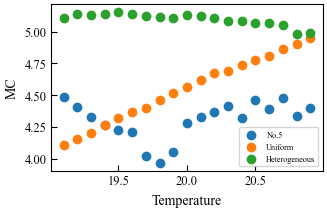

In [ ]:
# 看看TIMs_Hetero_tempsweep_Task_Pareto中的储层的MC与thermal stability中的uniform和heterogeneous的MC比较
filename = '../paretofront_points_TIMs_NARMA10/result_MC_heterogeneous_11_n5_sr20to30_w0.27-0.13-0.34-0.033-0.22_tr19.03to21.08s0.1_bs20_bt20.0_temp_sweep.csv'

df_TIMs_Hetero_n5 = pd.read_csv(filename)
plt.figure(figsize=plot_style_config.get_figsize('single'))
plt.scatter(
    df_TIMs_Hetero_n5['temp'],
    df_TIMs_Hetero_n5['MC'],
    label='No.5',
    marker='o',
    linewidth=1
)
plt.scatter(
    df_uniform['temp'],
    df_uniform['MC'],
    label='Uniform',
    marker='o',
    linewidth=1
)
plt.scatter(
    df_heterogeneous['temp'],
    df_heterogeneous['MC'],
    label='Heterogeneous',
    marker='o',
    linewidth=1
)
plt.xlabel('Temperature')
plt.ylabel('MC')
plt.legend()
plt.show()




查看KRandGR的数据

In [ ]:
# 设定参数
folder_loc = "../paretofront_points_TIMs_NARMA10" # 相对路径
pattern = "result_KRandGR_heterogeneous"
cols_needed = ['temp', 'CQ'] # 假设你需要这两列，根据实际情况修改

# 调用函数
df_all_KRandGR = load_and_merge_data(folder_loc, pattern, cols_needed)

# 检查数据
print(df_all_KRandGR.head())
print(f"包含的图例标签: {df_all_KRandGR['number'].unique()}")

找到 10 个文件，开始处理...
    temp  CQ  number
24  19.6   4       1
25  19.7   3       1
26  19.8   2       1
31  20.3  -1       1
27  19.9   0       1
包含的图例标签: [ 1  2  3  4  5  6  7  8  9 11]


<Figure size 350x216.316 with 0 Axes>

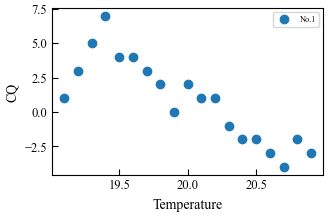

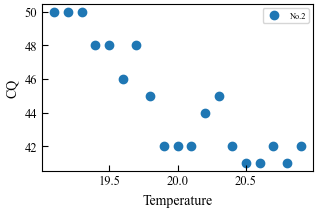

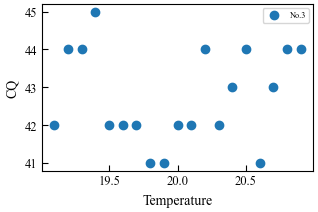

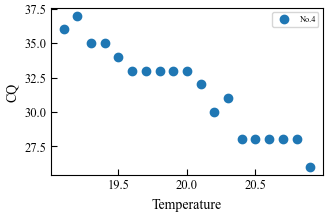

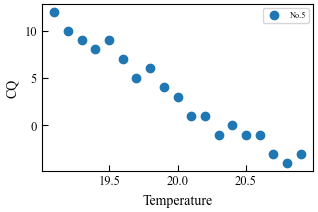

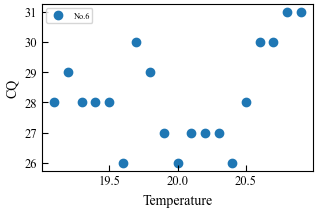

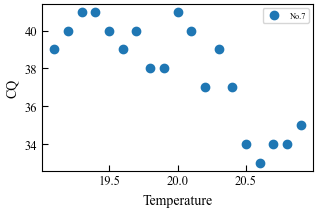

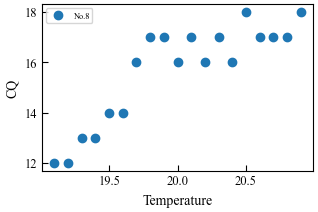

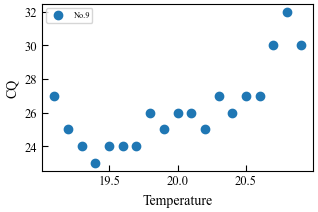

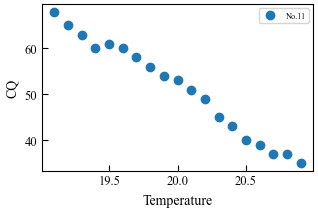

In [ ]:
# 开始画图
plot_style_config.set_pub_style()
 # 修正了括号

# 获取所有唯一的标签
labels = df_all_KRandGR['number'].unique()

# 循环遍历每一个标签，单独画一条线
for label in labels:

    plt.figure(figsize=plot_style_config.get_figsize('single'))
    # 筛选出当前标签的数据
    subset_KRandGR = df_all_KRandGR[df_all_KRandGR['number'] == label]
    
    plt.scatter(
        subset_KRandGR['temp'],
        subset_KRandGR['CQ'],
        label=label,  # 这里使用标签作为图例
        marker='o',
        linewidth=1
    )

    plt.xlabel('Temperature')
    plt.ylabel('CQ')
    plt.legend([f'No.{label}']) # 显示图例
    plt.show()

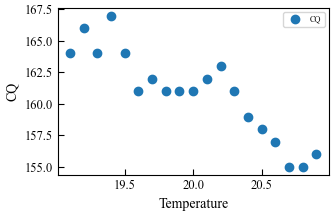

In [ ]:
# 看看uniform的CQ
filename = '../result_KRandGR_uniform_tr19.03to21.08s0.1_bs16.78_bt20.0_temp_sweep.csv'
df_uniform = pd.read_csv(filename)
plt.figure(figsize=plot_style_config.get_figsize('single'))
plt.scatter(
    df_uniform['temp'],
    df_uniform['CQ'],
    label='CQ',
    marker='o',
    linewidth=1
)
plt.xlabel('Temperature')
plt.ylabel('CQ')
plt.legend()
plt.show()

各组的 MAD 结果: {np.int64(1): np.float64(3.140447311029255), np.int64(2): np.float64(1.9067075850994395), np.int64(3): np.float64(4.663985082310289), np.int64(4): np.float64(2.4543341755894947), np.int64(5): np.float64(3.131931029881115), np.int64(6): np.float64(4.803407547730557), np.int64(7): np.float64(2.531583206215892), np.int64(8): np.float64(6.598986678006237), np.int64(9): np.float64(1.2424726066356875), np.int64(10): np.float64(3.2946574767824264), np.int64(11): np.float64(2.816016722528097)}


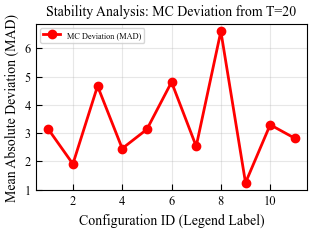

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from Plotting import plot_style_config

# 1. 准备存储结果的字典
mad_results = {}

# 建议：不要硬编码 np.arange(1, 12)，而是直接从数据中获取存在的 Legend
# lists = np.arange(1, 12, 1) 
lists = sorted(df_all['Legend_Label'].unique()) 

for i in lists:
    # 提取当前组的数据
    data = df_all[df_all['Legend_Label'] == i]
    
    # === 关键修改开始 ===
    
    # 1. 找到该组在 temp=20 时的基准 MC 值
    # 注意：这里假设每个组都有 temp=20 的数据
    try:
        ref_mc = data.loc[data['temp'] == 20.0, 'MC'].values[0]
    except IndexError:
        print(f"警告: 组 {i} 缺少 temp=20 的数据，跳过。")
        continue

    # 2. 计算 MAD (平均绝对偏差)
    # 公式: mean( |MC_current - MC_ref| )
    # mad_value = np.mean(np.abs(data['MC'] - ref_mc))
    
    # 如果你想用 MAPD (百分比偏差)，请用下面这行代替上面：
    mapd_value = np.mean(np.abs((data['MC'] - ref_mc) / ref_mc)) * 100
    
    # === 关键修改结束 ===
    
    mad_results[i] = mapd_value

print("各组的 MAD 结果:", mad_results)

# 3. 画图
plot_style_config.set_pub_style()
plt.figure(figsize=plot_style_config.get_figsize())

plt.plot(
    mad_results.keys(),   # X轴: 组号 (Legend)
    mad_results.values(), # Y轴: 偏差值 (MAD)
    label='MC Deviation (MAD)',
    color='red',          # 建议改个颜色区分于原始 MC
    marker='o',
    linestyle='-',
    linewidth=2 
)

# 4. 修正标签
plt.xlabel('Configuration ID (Legend Label)') # 之前是 Temperature，不对
plt.ylabel('Mean Absolute Deviation (MAD)')   # 之前是 MC，也不准确
plt.title('Stability Analysis: MC Deviation from T=20')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()


<Figure size 350x216.316 with 0 Axes>

<Figure size 350x216.316 with 0 Axes>

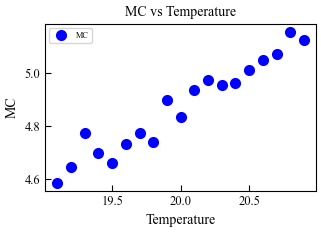

In [ ]:
plt.figure(figsize=plot_style_config.get_figsize())
plt.scatter(
    data['temp'],
    data['MC'],
    label='MC',
    color='blue',
    marker='o',
    linestyle='-',
    linewidth=2
)
plt.xlabel('Temperature')
plt.ylabel('MC')
plt.title('MC vs Temperature')
plt.legend()
plt.show()